+-----------+-----------+-------+----------------+-----------+
| Algoritmo |  Caminho  | Custo | Nós Expandidos | Tempo (s) |
+-----------+-----------+-------+----------------+-----------+
|    BFS    | A → B → G |   6   |       9        |  0.000151 |
|    UCS    | A → B → G |   6   |       6        |  0.000152 |
|   Greedy  | A → B → G |   6   |       15       |  0.000129 |
|     A*    | A → B → G |   6   |       9        |  0.000119 |
+-----------+-----------+-------+----------------+-----------+

Melhor caminho: BFS - A → B → G



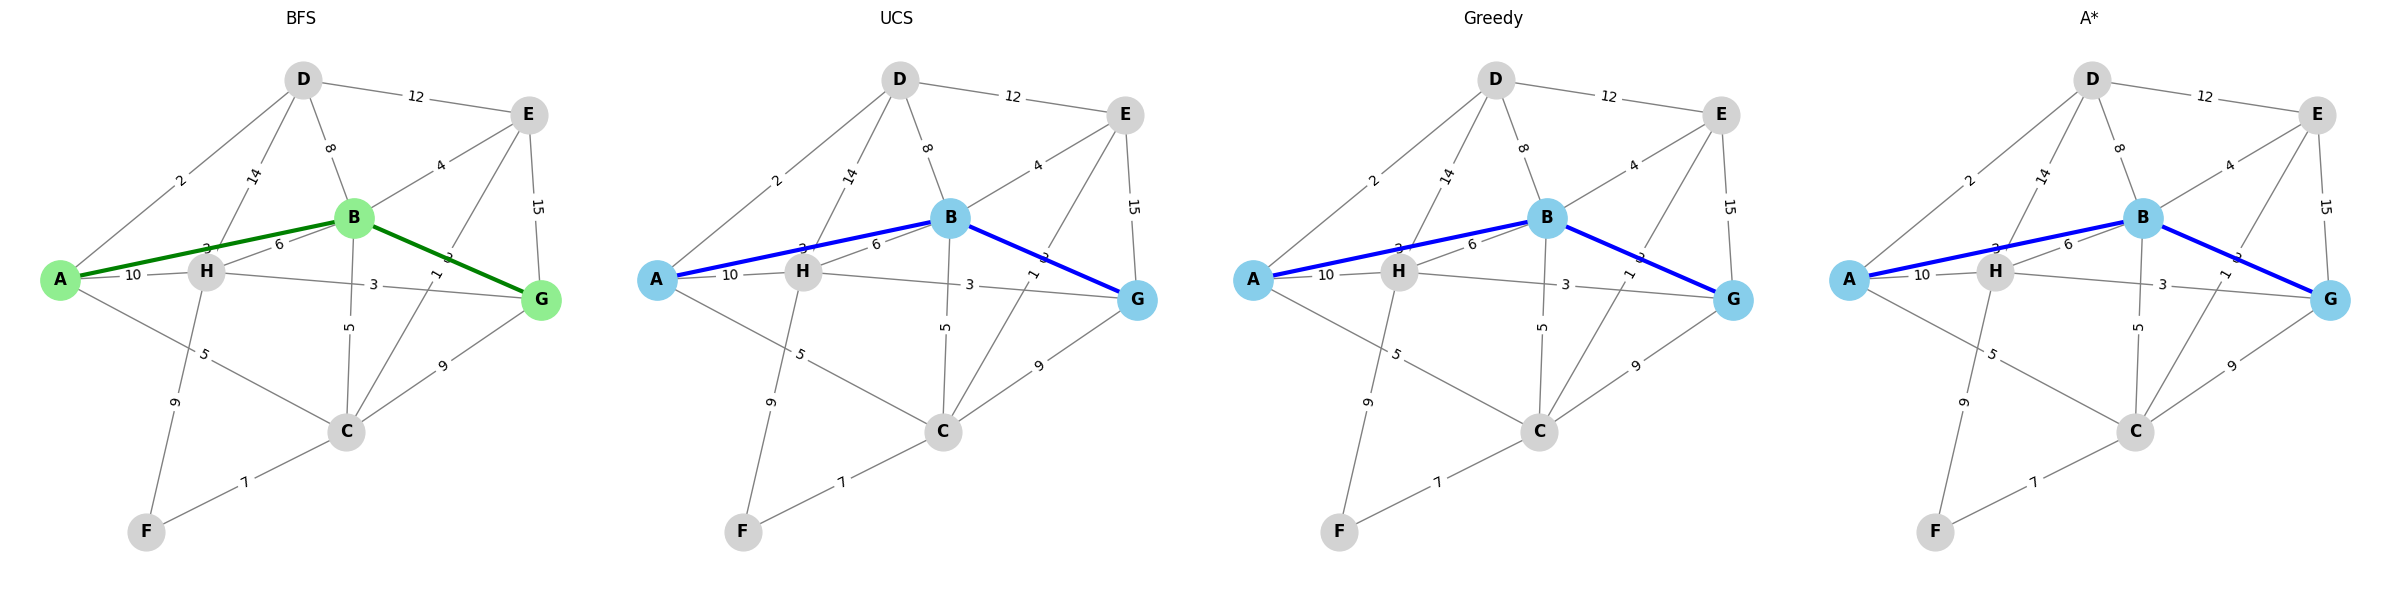

In [ ]:
from collections import deque
from queue import PriorityQueue
import matplotlib.pyplot as plt
import networkx as nx
from prettytable import PrettyTable
import time


"""#grafo como lista de adjacência
grafo = {
    'A': {'B': 3, 'C': 5, 'D': 2, 'H': 10},
    'B': {'A': 3, 'C': 5, 'D': 8, 'E': 4, 'G': 6, 'H': 6},
    'C': {'A': 5, 'B': 5, 'F': 7, 'E': 1, 'G': 9},
    'D': {'A': 2, 'B': 8, 'E': 12, 'H': 14},
    'E': {'C': 1, 'B': 4, 'D': 12, 'G': 15},
    'F': {'C': 7, 'H': 9},
    'G': {'B': 6, 'C': 9, 'E': 15, 'H': 3},
    'H': {'A': 10, 'B': 6, 'D': 14, 'F': 9, 'G': 3}
}"""

G = nx.Graph()
arestas = [
    ('A', 'B', 3), ('A', 'C', 5), ('A', 'D', 2), ('A', 'H', 10),
    ('B', 'C', 5), ('B', 'D', 8), ('B', 'E', 4), ('B', 'G', 3), ('B', 'H', 6),
    ('C', 'E', 1), ('C', 'F', 7), ('C', 'G', 9),
    ('D', 'E', 12), ('D', 'H', 14),
    ('E', 'G', 15),
    ('F', 'H', 9),
    ('G', 'H', 3),
]
G.add_weighted_edges_from(arestas)

heuristica = {
    'A': 10, 'B': 8, 'C': 5, 'D': 4,
    'E': 7, 'F': 6, 'G': 9, 'H': 3
}
"""
sem querer a heuristica faz os pesos ficarem iguais
mas se mudar os pesos da heuristica fica diferente
então acho q deve ser uma coincidência
"""
def bfs(start, goal):
    start_time = time.time()
    visited = set()
    queue = deque([[start]])
    nodes_expanded = 0

    while queue:
        path = queue.popleft()
        node = path[-1]
        nodes_expanded += 1

        if node == goal:
            cost = sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
            return path, cost, nodes_expanded, time.time() - start_time

        if node not in visited:
            visited.add(node)
            for neighbor in G[node]:
                if neighbor not in path:
                    new_path = list(path)
                    new_path.append(neighbor)
                    queue.append(new_path)

    return [], float('inf'), nodes_expanded, time.time() - start_time

def ucs(start, goal):
    start_time = time.time()
    visited = set()
    pq = PriorityQueue()
    pq.put((0, start, []))
    nodes_expanded = 0

    while not pq.empty():
        cost, node, path = pq.get()
        nodes_expanded += 1

        if node in visited:
            continue
        visited.add(node)
        path = path + [node]

        if node == goal:
            return path, cost, nodes_expanded, time.time() - start_time

        for neighbor in G[node]:
            if neighbor not in visited:
                total_cost = cost + G[node][neighbor]['weight']
                pq.put((total_cost, neighbor, path))

    return [], float('inf'), nodes_expanded, time.time() - start_time

def greedy(start, goal):
    start_time = time.time()
    pq = PriorityQueue()
    pq.put((heuristica[start], start, []))
    visited = set()
    nodes_expanded = 0

    while not pq.empty():
        h, node, path = pq.get()
        nodes_expanded += 1

        if node in visited:
            continue
        visited.add(node)
        path = path + [node]

        if node == goal:
            cost = sum(G[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
            return path, cost, nodes_expanded, time.time() - start_time

        for neighbor in G[node]:
            if neighbor not in visited:
                pq.put((heuristica[neighbor], neighbor, path))

    return [], float('inf'), nodes_expanded, time.time() - start_time

def a_estrela(start, goal):
    start_time = time.time()
    pq = PriorityQueue()
    pq.put((heuristica[start], 0, start, []))
    visited = set()
    nodes_expanded = 0

    while not pq.empty():
        f, g, node, path = pq.get()
        nodes_expanded += 1

        if node in visited:
            continue
        visited.add(node)
        path = path + [node]

        if node == goal:
            return path, g, nodes_expanded, time.time() - start_time

        for neighbor in G[node]:
            if neighbor not in visited:
                new_g = g + G[node][neighbor]['weight']
                new_f = new_g + heuristica[neighbor]
                pq.put((new_f, new_g, neighbor, path))

    return [], float('inf'), nodes_expanded, time.time() - start_time

def comparar_algoritmos(start, goal):
    algoritmos = {
        'BFS': bfs,
        'UCS': ucs,
        'Greedy': greedy,
        'A*': a_estrela
    }

    tabela = PrettyTable()
    tabela.field_names = ["Algoritmo", "Caminho", "Custo", "Nós Expandidos", "Tempo (s)"]

    resultados = {}
    caminhos = {}

    for nome, func in algoritmos.items():
        caminho, custo, expandidos, tempo = func(start, goal)
        caminho_formatado = ' → '.join(caminho)
        tabela.add_row([nome, caminho_formatado, custo, expandidos, f"{tempo:.6f}"])
        resultados[nome] = {
            'caminho': caminho,
            'custo': custo,
            'expandidos': expandidos,
            'tempo': tempo
        }
        caminhos[nome] = caminho

    print(tabela)

    nome_melhor = min(resultados, key=lambda nome: resultados[nome]['custo'])
    caminho_melhor = resultados[nome_melhor]['caminho']
    print(f"\nMelhor caminho: {nome_melhor} - {' → '.join(caminho_melhor)}\n")
    #leva em consideração peso, custo e tempo

    fig, axs = plt.subplots(1, 4, figsize=(24, 6))
    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    for i, (nome, caminho) in enumerate(caminhos.items()):
        nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray',
                node_size=700, font_weight='bold', ax=axs[i])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=axs[i])

        path_edges = list(zip(caminho, caminho[1:]))
        edge_color = 'green' if nome == nome_melhor else 'blue'
        node_color = 'lightgreen' if nome == nome_melhor else 'skyblue'

        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color=edge_color, width=3, ax=axs[i])
        nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color=node_color, node_size=800, ax=axs[i])

        axs[i].set_title(nome)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

comparar_algoritmos('A', 'G')